# Data Preprocessing

## Imports

In [1]:
# Basic imports
import pandas as pd
import numpy as np
import copy
import re

# Visualization imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# sklearn imports
from sklearn.experimental import enable_halving_search_cv
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, roc_curve, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# NLTK imports
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import wordnet, stopwords
from nltk import pos_tag, WordNetLemmatizer

# NLTK downloads
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('omw-1.4')

#For Warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

#For XGBoost
from xgboost import XGBClassifier

## Looking at the Data

In [ ]:
df = pd.read_csv('/Users/Arsh/Flatiron/Gitlab/Capstone/Full Dataset')
df = df.drop(columns=['Unnamed: 0'])
df_original = copy.deepcopy(df)

In [ ]:
# Sanity check
df.info()

In [ ]:
df.corr()

In [ ]:
df.Tweet.iloc[37493]

##  Preprocessing

I will clean all of the tweets in my data and get it ready for NLP. 

### Tokenization 

In [ ]:
stop_words = stopwords.words('english')
stop_words

In [ ]:
# I removed some stop words as, IMO, they remove context in the tweets that signify meaning.
my_stopwords = ['i',
                'me',
                'my',
                'myself',
                'we',
                'our',
                'ours',
                'ourselves',
                'you',
                "you're",
                "you've",
                "you'll",
                "you'd",
                'your',
                'yours',
                'yourself',
                'yourselves',
                'he',
                'him',
                'his',
                'himself',
                'she',
                "she's",
                'her',
                'hers',
                'herself',
                'it',
                "it's",
                'its',
                'itself',
                'they',
                'them',
                'their',
                'theirs',
                'themselves',
                'what',
                'which',
                'who',
                'whom',
                'this',
                'that',
                "that'll",
                'these',
                'those',
                'am',
                'is',
                'are',
                'was',
                'were',
                'be',
                'been',
                'being',
                'have',
                'has',
                'had',
                'having',
                'do',
                'does',
                'did',
                'doing',
                'a',
                'an',
                'the',
                'and',
                'but',
                'if',
                'or',
                'because',
                'as',
                'until',
                'while',
                'of',
                'at',
                'by',
                'for',
                'with',
                'about',
                'between',
                'into',
                'through',
                'during',
                'before',
                'after',
                'above',
                'below',
                'to',
                'from',
                'up',
                'down',
                'in',
                'out',
                'on',
                'off',
                'over',
                'under',
                'again',
                'further',
                'then',
                'once',
                'here',
                'there',
                'when',
                'where',
                'why',
                'how',
                'all',
                'any',
                'both',
                'each',
                'few',
                'more',
                'most',
                'other',
                'some',
                'such',
                'only',
                'own',
                'same',
                'so',
                'than',
                'too',
                'very',
                's',
                't',
                'can',
                'will',
                'just',
                'don',
                "don't",
                'should',
                "should've",
                'now',
                'd',
                'll',
                'm',
                'o',
                're',
                've',
                'y',
                'ain',
                'aren',
                "aren't",
                'couldn',
                "couldn't",
                'didn',
                "didn't",
                "doesn't",
                'hadn',
                "hadn't",
                'hasn',
                "hasn't",
                'haven',
                "haven't",
                'isn',
                "isn't",
                'ma',
                'mightn',
                "mightn't",
                'mustn',
                "mustn't",
                'needn',
                "needn't",
                'shan',
                "shan't",
                "shouldn't",
                "wasn't",
                "weren't",
                'won',
                "won't",
                "wouldn't"]

In [ ]:
df.Tweet.iloc[37493]

In [ ]:
tknzr = TweetTokenizer(
    strip_handles=True, reduce_len=True, preserve_case=False)

The parameters in the tokenizer remove @handles, lowercases all words, and reduces the length of exaggerated grammar (such as turning looooool into loool.)

In [ ]:
def tweet_preprocessor(tweet, min_tok):

    wnl = WordNetLemmatizer()

    def pos_tagger(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        else:
            return None

    tweet_sweeper = tweet.lower()
    tweet_sweeper = re.sub(r"@[a-z0-9_]+|#[a-z0-9_]+|http\S+", "",
                           tweet_sweeper).strip().replace("\r", "").replace("\n", "").replace("\t", "")
    clean_tweet = [x for x in tknzr.tokenize(tweet_sweeper) if (
        (x.isalpha()) & (x not in my_stopwords))]
    wordnet_tagged = list(
        map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(clean_tweet)))

    if len(wordnet_tagged) < min_tok:
        return ''
    else:
        clean_tweet = " ".join([wnl.lemmatize(x[0], x[1])
                               for x in wordnet_tagged if x[1] is not None])
        return clean_tweet

In [ ]:
df.Tweet = df.Tweet.apply(tweet_preprocessor, min_tok=8)

In [ ]:
processed_tweets = df[df['Tweet'] != '']

In [2]:
#processed_tweets.to_csv('Processed Tweets')
processed_tweets = pd.read_csv('/Users/Arsh/Flatiron/Gitlab/Capstone/Processed Tweets')
processed_tweets = processed_tweets.drop(columns=['Unnamed: 0'])
processed_tweets = processed_tweets.reset_index(drop=True)
processed_tweets

,Date,Tweet,Username,Political_Score,Democrat_Score,Republican_Score,political_group
0,2017-01-03,watch live address congress underscoring impor...,SpeakerPelosi,1,0.0,NaN,Democratic Moderates
1,2017-01-03,gop reversal plan destroy not obscure clear co...,SpeakerPelosi,1,0.0,NaN,Democratic Moderates
2,2017-01-03,open congress pay tribute serve serve sacrific...,SpeakerPelosi,1,0.0,NaN,Democratic Moderates
3,2017-01-03,yet american know attempt destroy medicare med...,SpeakerPelosi,1,0.0,NaN,Democratic Moderates
4,2017-01-03,continue protect clean air clean water right l...,SpeakerPelosi,1,0.0,NaN,Democratic Moderates
...,...,...,...,...,...,...,...
324439,2022-11-13,u economy need change urge biden admin work re...,senrobportman,0,NaN,0.0,Republican Moderates
324440,2022-11-14,big week folk big win gotta keep go let talk,DougJones,1,0.0,NaN,Democratic Moderates
324441,2022-11-14,feed reduce demand raise interest rate unemplo...,senrobportman,0,NaN,0.0,Republican Moderates
324442,2022-11-14,world leave incrementalism dust america lead w...,SpeakerPelosi,1,0.0,NaN,Democratic Moderates


In [3]:
processed_tweets.Political_Score.value_counts()

1    174664
0    149780
Name: Political_Score, dtype: int64

In [8]:
X = processed_tweets['Tweet']
y = processed_tweets['Political_Score']

## Baseline Model - Multinomial Naive Bayes

In [53]:
cv = CountVectorizer(max_features = 100)
clf = GaussianNB()

In [54]:
X_fit_transformed = cv.fit_transform(X)

In [55]:
X_fit_transformed

<324444x100 sparse matrix of type '<class 'numpy.int64'>'
	with 1416519 stored elements in Compressed Sparse Row format>

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
           X_fit_transformed, y, test_size = 0.1, stratify = y, random_state = 95)

In [57]:
# Cannot be done in a previous step as test train splitting on a large array breaks the kernel : )
X_train = X_train.toarray()
X_test = X_test.toarray()

In [58]:
len(X_test)

32445

In [59]:
clf.fit(X_train, y_train)

GaussianNB()

In [60]:
y_pred = clf.predict(X_test)

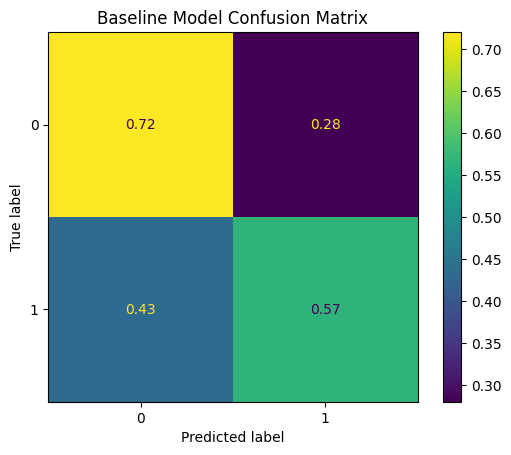

In [65]:
plot_confusion_matrix(clf, X_test, y_test, normalize = 'true')
plt.title ('Baseline Model Confusion Matrix')
plt.show()

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.72      0.65     14978
           1       0.70      0.57      0.63     17467

    accuracy                           0.64     32445
   macro avg       0.65      0.64      0.64     32445
weighted avg       0.65      0.64      0.64     32445



In [63]:
roc_auc_score(y_test, y_pred)

0.6434195794564075

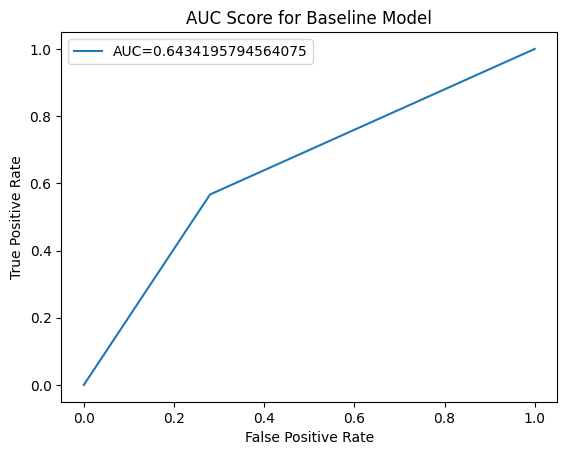

In [66]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('AUC Score for Baseline Model')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Very successful for a baseline model. Let's play around with the parameters. In the baseline, I used the top 100 features or used the top 100 words in the corpus. 

### Finetuning the NB Model

In [ ]:
### Playing with the parameters

In [ ]:
cv_ft = CountVectorizer(max_features = 2200)

In [ ]:
X_fit_tra_ft = cv_ft.fit_transform(X)

In [ ]:
X_train_ft, X_test_ft, y_train_ft, y_test_ft = train_test_split(
           X_fit_tra_ft, y, test_size = 0.1, stratify = y, random_state = 95)

In [ ]:
X_train_ft = X_train_ft.toarray()
X_test_ft = X_test_ft.toarray()

In [ ]:
clf.fit(X_train_ft, y_train_ft)

In [ ]:
y_pred_ft = clf.predict(X_test_ft)

In [ ]:
plot_confusion_matrix(clf, X_test_ft, y_test_ft)  
plt.show()

In [ ]:
print(classification_report(y_test_ft, y_pred_ft))

In [ ]:
roc_auc_score(y_test_ft, y_pred_ft)

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test_ft,  y_pred_ft)
auc = metrics.roc_auc_score(y_test_ft, y_pred_ft)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

I think this is the best I can finetune with a CountVectorizer. 

### Baseline model with a TFID vectorizer

In [ ]:
tfidf = TfidfVectorizer(max_features = 100)

In [ ]:
X_tfidf = tfidf.fit_transform(X)

In [ ]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
           X_tfidf, y, test_size = 0.1, stratify = y, random_state = 95)

In [ ]:
X_train_tfidf= X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

In [ ]:
clf.fit(X_train_tfidf, y_train_tfidf)

In [ ]:
y_pred_tfidf = clf.predict(X_test_tfidf)

In [ ]:
plot_confusion_matrix(clf, X_test_tfidf, y_test_tfidf)  
plt.show()

In [ ]:
print(classification_report(y_test_tfidf, y_pred_tfidf))

In [ ]:
roc_auc_score(y_test_tfidf, y_pred_tfidf)

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test_tfidf,  y_pred_tfidf)
auc = metrics.roc_auc_score(y_test_tfidf, y_pred_tfidf)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

This is the new baseline for tfidf. Without any parameter tuning, this is worse than the countvectorizer. 

### Baseline Model with TFIDF vectorizer - Model Tuning

In [5]:
tfidf = TfidfVectorizer(max_features = 2500, min_df = 200)

In [6]:
X_tfidf_ft = tfidf.fit_transform(X)

In [7]:
X_train_tfidf_ft, X_test_tfidf_ft, y_train_tfidf_ft, y_test_tfidf_ft = train_test_split(
           X_tfidf_ft, y, test_size = 0.1, stratify = y, random_state = 95)

In [8]:
X_train_tfidf_ft= X_train_tfidf_ft.toarray()
X_test_tfidf_ft = X_test_tfidf_ft.toarray()

In [ ]:
clf.fit(X_train_tfidf_ft, y_train_tfidf_ft)

In [ ]:
y_pred_tfidf_ft = clf.predict(X_test_tfidf_ft)

In [ ]:
plot_confusion_matrix(clf, X_test_tfidf_ft, y_test_tfidf_ft)  
plt.show()

In [ ]:
print(classification_report(y_test_tfidf_ft, y_pred_tfidf_ft))

In [ ]:
roc_auc_score(y_test_tfidf_ft, y_pred_tfidf_ft)

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test_tfidf_ft,  y_pred_tfidf_ft)
auc = metrics.roc_auc_score(y_test_tfidf_ft, y_pred_tfidf_ft)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

I think we have hit the limitation of what can be done with a Naive Bayes classifier. We struggle to go beyong 0.76 in terms of  F1 score. Now, I will move on to using decsions trees and random forests.

## Random Forest

In [ ]:
forest_pipe = Pipeline([('model', RandomForestClassifier(n_estimators = 100, random_state = 95, n_jobs = -1, verbose = 2))])

For this model, I will use the already vectorized data from the tfidf model. 

In [ ]:
forest_pipe.fit(X_train_tfidf_ft, y_train_tfidf_ft)

In [ ]:
y_forest_pred = forest_pipe.predict(X_test_tfidf_ft)

In [ ]:
plot_confusion_matrix(forest_pipe, X_test_tfidf_ft, y_test_tfidf_ft)  
plt.show()

In [ ]:
print(classification_report(y_test_tfidf_ft, y_forest_pred))

In [ ]:
roc_auc_score(y_test_tfidf_ft, y_forest_pred)

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test_tfidf_ft,  y_forest_pred)
auc = metrics.roc_auc_score(y_test_tfidf_ft, y_forest_pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

This is excellent. Off the bat, this is far more optimal than the other models. Now for model tuning.

### Hypertuning the Random Forest with HalvingRandomSearchCV

In [ ]:
forest_param_grid = {'model__n_estimators': [225, 250, 275, 300, 325] , 'model__criterion' : ['gini', 'entropy'], 
                     'model__min_samples_leaf': [1, 3], 'model__max_features': [15, 20, 25, 30, 35], 'model__bootstrap' : [True, False]}


In [ ]:
halving_cv = HalvingRandomSearchCV(forest_pipe, forest_param_grid, scoring="f1", n_jobs=-1, min_resources=2222, max_resources = 90000, cv = 5, factor=3, verbose = 2, random_state = 95)

In [ ]:
halving_cv.fit(X_train_tfidf_ft, y_train_tfidf_ft)
# Will take 45 minutes to run.

In [ ]:
halving_cv.best_score_

In [ ]:
halving_cv.best_params_

In [ ]:
optimal_model = halving_cv.best_estimator_
optimal_model

In [ ]:
optimal_model

In [ ]:
forest_pipe_optimized = Pipeline([('model', RandomForestClassifier(
    n_estimators=250, min_samples_leaf=1, max_features=15, criterion='gini', bootstrap=False, verbose=2, n_jobs=-1, random_state=95))])

In [ ]:
forest_pipe_optimized.fit(X_train_tfidf_ft, y_train_tfidf_ft)

In [ ]:
y_forest_pred_ft2 = forest_pipe_optimized.predict(X_test_tfidf_ft)

In [ ]:
plot_confusion_matrix(forest_pipe_optimized, X_test_tfidf_ft, y_test_tfidf_ft)  
plt.show()

In [ ]:
print(classification_report(y_test_tfidf_ft, y_forest_pred_ft2))

In [ ]:
roc_auc_score(y_test_tfidf_ft, y_forest_pred_ft2)

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test_tfidf_ft,  y_forest_pred_ft2)
auc = metrics.roc_auc_score(y_test_tfidf_ft, y_forest_pred_ft2)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

This is the best model so far, with the highest accuracy, recall, and F! score.

## Boosting Models

### Hist Gradient Boosting Classifier

In [ ]:
hgbc = HistGradientBoostingClassifier(max_iter=100, learning_rate=1.0, max_depth=1, verbose = 2, random_state=95).fit(X_train_tfidf_ft, y_train_tfidf_ft)

In [ ]:
y_hgbc = hgbc.predict(X_test_tfidf_ft)

In [ ]:
plot_confusion_matrix(hgbc, X_test_tfidf_ft, y_test_tfidf_ft)  
plt.show()

In [ ]:
print(classification_report(y_test_tfidf_ft, y_hgbc))

In [ ]:
roc_auc_score(y_test_tfidf_ft, y_hgbc)

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test_tfidf_ft,  y_hgbc)
auc = metrics.roc_auc_score(y_test_tfidf_ft, y_hgbc)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Not bad. This is much faster than the other models. But, this was the most odd, and wrong, confusion matrix, of all the models I have used.

#### Hypertuning a Hist Gradient Boosting Classifier

In [ ]:
hgbc_grid = {'model__learning_rate' : [0.001, 0.005, 0.1, 0.15], 'model__max_iter': [230], 
                     'model__min_samples_leaf': [3], 'model__max_leaf_nodes' : [29], 'model__max_depth' : [21]}

In [ ]:
hgbc_pipe = Pipeline([('model', HistGradientBoostingClassifier(random_state = 95, verbose = 2))])

In [ ]:
halving_cv_hgbc = HalvingRandomSearchCV(hgbc_pipe, hgbc_grid, scoring="f1", n_jobs=-1, min_resources=2222, max_resources = 60000, cv = 5, factor=3, verbose = 2, random_state = 95)

In [ ]:
halving_cv_hgbc.fit(X_train_tfidf_ft, y_train_tfidf_ft)

In [ ]:
y_hgbc_ft = halving_cv_hgbc.predict(X_test_tfidf_ft)

In [ ]:
halving_cv_hgbc.best_score_

In [ ]:
halving_cv_hgbc.best_params_

In [ ]:
optimal_model_hgbc = halving_cv_hgbc.best_estimator_
optimal_model_hgbc

In [ ]:
{'model__min_samples_leaf': 3,
 'model__max_leaf_nodes': 29,
 'model__max_iter': 230,
 'model__max_depth': 21,
 'model__learning_rate': 0.1}

In [ ]:
hgbc_optimized = Pipeline([('model', HistGradientBoostingClassifier(learning_rate=0.01, max_depth=21, max_iter=230,
                               max_leaf_nodes=29, min_samples_leaf=3,
                               random_state=95, verbose=2))])

In [ ]:
hgbc_optimized.fit(X_train_tfidf_ft, y_train_tfidf_ft)

In [ ]:
y_hgbc_ft = hgbc_optimized.predict(X_test_tfidf_ft)

In [ ]:
plot_confusion_matrix(hgbc_optimized, X_test_tfidf_ft, y_test_tfidf_ft)  
plt.show()

In [ ]:
print(classification_report(y_test_tfidf_ft, y_hgbc_ft))

In [ ]:
roc_auc_score(y_test_tfidf_ft, y_hgbc_ft)

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test_tfidf_ft,  y_hgbc_ft)
auc = metrics.roc_auc_score(y_test_tfidf_ft, y_hgbc_ft)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

### CatBoost

In [ ]:
pip install catboost

In [112]:
from catboost import CatBoostClassifier
model_CBC = CatBoostClassifier()

In [113]:
model_CBC.fit(X_train_tfidf_ft, y_train_tfidf_ft)

Learning rate set to 0.116319
0:	learn: 0.6805588	total: 324ms	remaining: 5m 23s
1:	learn: 0.6712869	total: 559ms	remaining: 4m 38s
2:	learn: 0.6641628	total: 772ms	remaining: 4m 16s
3:	learn: 0.6579186	total: 998ms	remaining: 4m 8s
4:	learn: 0.6517885	total: 1.21s	remaining: 4m 1s
5:	learn: 0.6476682	total: 1.42s	remaining: 3m 56s
6:	learn: 0.6439653	total: 1.64s	remaining: 3m 52s
7:	learn: 0.6401412	total: 1.85s	remaining: 3m 49s
8:	learn: 0.6365019	total: 2.07s	remaining: 3m 47s
9:	learn: 0.6327291	total: 2.28s	remaining: 3m 45s
10:	learn: 0.6300596	total: 2.49s	remaining: 3m 43s
11:	learn: 0.6275215	total: 2.7s	remaining: 3m 42s
12:	learn: 0.6241432	total: 2.94s	remaining: 3m 43s
13:	learn: 0.6216416	total: 3.16s	remaining: 3m 42s
14:	learn: 0.6194649	total: 3.38s	remaining: 3m 41s
15:	learn: 0.6171061	total: 3.6s	remaining: 3m 41s
16:	learn: 0.6149811	total: 3.8s	remaining: 3m 39s
17:	learn: 0.6128171	total: 4s	remaining: 3m 38s
18:	learn: 0.6107743	total: 4.22s	remaining: 3m 38s


159:	learn: 0.5002642	total: 32.3s	remaining: 2m 49s
160:	learn: 0.4998753	total: 32.5s	remaining: 2m 49s
161:	learn: 0.4994999	total: 32.6s	remaining: 2m 48s
162:	learn: 0.4991016	total: 32.8s	remaining: 2m 48s
163:	learn: 0.4987825	total: 33s	remaining: 2m 48s
164:	learn: 0.4984179	total: 33.2s	remaining: 2m 48s
165:	learn: 0.4980928	total: 33.4s	remaining: 2m 47s
166:	learn: 0.4978088	total: 33.6s	remaining: 2m 47s
167:	learn: 0.4973340	total: 33.8s	remaining: 2m 47s
168:	learn: 0.4969493	total: 34s	remaining: 2m 47s
169:	learn: 0.4964379	total: 34.2s	remaining: 2m 46s
170:	learn: 0.4960824	total: 34.3s	remaining: 2m 46s
171:	learn: 0.4957638	total: 34.5s	remaining: 2m 46s
172:	learn: 0.4953776	total: 34.7s	remaining: 2m 46s
173:	learn: 0.4950927	total: 34.9s	remaining: 2m 45s
174:	learn: 0.4947148	total: 35.1s	remaining: 2m 45s
175:	learn: 0.4942250	total: 35.3s	remaining: 2m 45s
176:	learn: 0.4937927	total: 35.5s	remaining: 2m 45s
177:	learn: 0.4933059	total: 35.7s	remaining: 2m 4

316:	learn: 0.4569786	total: 1m 2s	remaining: 2m 14s
317:	learn: 0.4567728	total: 1m 2s	remaining: 2m 14s
318:	learn: 0.4565826	total: 1m 2s	remaining: 2m 14s
319:	learn: 0.4564089	total: 1m 2s	remaining: 2m 13s
320:	learn: 0.4562380	total: 1m 3s	remaining: 2m 13s
321:	learn: 0.4559447	total: 1m 3s	remaining: 2m 13s
322:	learn: 0.4557285	total: 1m 3s	remaining: 2m 13s
323:	learn: 0.4555403	total: 1m 3s	remaining: 2m 12s
324:	learn: 0.4552120	total: 1m 3s	remaining: 2m 12s
325:	learn: 0.4550393	total: 1m 4s	remaining: 2m 12s
326:	learn: 0.4548279	total: 1m 4s	remaining: 2m 12s
327:	learn: 0.4545914	total: 1m 4s	remaining: 2m 12s
328:	learn: 0.4543878	total: 1m 4s	remaining: 2m 12s
329:	learn: 0.4541450	total: 1m 5s	remaining: 2m 11s
330:	learn: 0.4539462	total: 1m 5s	remaining: 2m 11s
331:	learn: 0.4537487	total: 1m 5s	remaining: 2m 11s
332:	learn: 0.4535616	total: 1m 5s	remaining: 2m 11s
333:	learn: 0.4533031	total: 1m 5s	remaining: 2m 11s
334:	learn: 0.4531304	total: 1m 6s	remaining: 

470:	learn: 0.4316004	total: 1m 31s	remaining: 1m 43s
471:	learn: 0.4314556	total: 1m 32s	remaining: 1m 43s
472:	learn: 0.4313327	total: 1m 32s	remaining: 1m 42s
473:	learn: 0.4312166	total: 1m 32s	remaining: 1m 42s
474:	learn: 0.4311141	total: 1m 32s	remaining: 1m 42s
475:	learn: 0.4309726	total: 1m 32s	remaining: 1m 42s
476:	learn: 0.4308566	total: 1m 33s	remaining: 1m 42s
477:	learn: 0.4307173	total: 1m 33s	remaining: 1m 41s
478:	learn: 0.4306212	total: 1m 33s	remaining: 1m 41s
479:	learn: 0.4304450	total: 1m 33s	remaining: 1m 41s
480:	learn: 0.4303127	total: 1m 33s	remaining: 1m 41s
481:	learn: 0.4301359	total: 1m 34s	remaining: 1m 41s
482:	learn: 0.4300251	total: 1m 34s	remaining: 1m 40s
483:	learn: 0.4298441	total: 1m 34s	remaining: 1m 40s
484:	learn: 0.4296730	total: 1m 34s	remaining: 1m 40s
485:	learn: 0.4295344	total: 1m 34s	remaining: 1m 40s
486:	learn: 0.4294259	total: 1m 34s	remaining: 1m 40s
487:	learn: 0.4293123	total: 1m 35s	remaining: 1m 39s
488:	learn: 0.4292015	total:

623:	learn: 0.4139274	total: 2m 1s	remaining: 1m 13s
624:	learn: 0.4138116	total: 2m 1s	remaining: 1m 12s
625:	learn: 0.4137167	total: 2m 1s	remaining: 1m 12s
626:	learn: 0.4136186	total: 2m 2s	remaining: 1m 12s
627:	learn: 0.4134878	total: 2m 2s	remaining: 1m 12s
628:	learn: 0.4134010	total: 2m 2s	remaining: 1m 12s
629:	learn: 0.4133122	total: 2m 2s	remaining: 1m 11s
630:	learn: 0.4132394	total: 2m 2s	remaining: 1m 11s
631:	learn: 0.4130944	total: 2m 2s	remaining: 1m 11s
632:	learn: 0.4129692	total: 2m 3s	remaining: 1m 11s
633:	learn: 0.4128681	total: 2m 3s	remaining: 1m 11s
634:	learn: 0.4127619	total: 2m 3s	remaining: 1m 10s
635:	learn: 0.4126667	total: 2m 3s	remaining: 1m 10s
636:	learn: 0.4125871	total: 2m 3s	remaining: 1m 10s
637:	learn: 0.4125068	total: 2m 4s	remaining: 1m 10s
638:	learn: 0.4124229	total: 2m 4s	remaining: 1m 10s
639:	learn: 0.4123309	total: 2m 4s	remaining: 1m 9s
640:	learn: 0.4122253	total: 2m 4s	remaining: 1m 9s
641:	learn: 0.4121263	total: 2m 4s	remaining: 1m

779:	learn: 0.3996621	total: 2m 31s	remaining: 42.7s
780:	learn: 0.3995815	total: 2m 31s	remaining: 42.5s
781:	learn: 0.3994617	total: 2m 31s	remaining: 42.3s
782:	learn: 0.3993784	total: 2m 31s	remaining: 42.1s
783:	learn: 0.3992863	total: 2m 32s	remaining: 41.9s
784:	learn: 0.3991366	total: 2m 32s	remaining: 41.7s
785:	learn: 0.3990068	total: 2m 32s	remaining: 41.5s
786:	learn: 0.3989288	total: 2m 32s	remaining: 41.3s
787:	learn: 0.3988352	total: 2m 32s	remaining: 41.1s
788:	learn: 0.3987763	total: 2m 33s	remaining: 40.9s
789:	learn: 0.3987037	total: 2m 33s	remaining: 40.7s
790:	learn: 0.3986302	total: 2m 33s	remaining: 40.5s
791:	learn: 0.3985639	total: 2m 33s	remaining: 40.3s
792:	learn: 0.3984974	total: 2m 33s	remaining: 40.1s
793:	learn: 0.3984121	total: 2m 33s	remaining: 39.9s
794:	learn: 0.3983461	total: 2m 34s	remaining: 39.8s
795:	learn: 0.3982539	total: 2m 34s	remaining: 39.6s
796:	learn: 0.3981814	total: 2m 34s	remaining: 39.4s
797:	learn: 0.3981072	total: 2m 34s	remaining:

935:	learn: 0.3877061	total: 3m 1s	remaining: 12.4s
936:	learn: 0.3876489	total: 3m 1s	remaining: 12.2s
937:	learn: 0.3876048	total: 3m 1s	remaining: 12s
938:	learn: 0.3875222	total: 3m 2s	remaining: 11.8s
939:	learn: 0.3874650	total: 3m 2s	remaining: 11.6s
940:	learn: 0.3873453	total: 3m 2s	remaining: 11.4s
941:	learn: 0.3872846	total: 3m 2s	remaining: 11.3s
942:	learn: 0.3872300	total: 3m 2s	remaining: 11.1s
943:	learn: 0.3871729	total: 3m 3s	remaining: 10.9s
944:	learn: 0.3871090	total: 3m 3s	remaining: 10.7s
945:	learn: 0.3870448	total: 3m 3s	remaining: 10.5s
946:	learn: 0.3869499	total: 3m 3s	remaining: 10.3s
947:	learn: 0.3868883	total: 3m 3s	remaining: 10.1s
948:	learn: 0.3868274	total: 3m 4s	remaining: 9.89s
949:	learn: 0.3867723	total: 3m 4s	remaining: 9.7s
950:	learn: 0.3866935	total: 3m 4s	remaining: 9.5s
951:	learn: 0.3866349	total: 3m 4s	remaining: 9.31s
952:	learn: 0.3865593	total: 3m 4s	remaining: 9.12s
953:	learn: 0.3864846	total: 3m 5s	remaining: 8.92s
954:	learn: 0.38

In [114]:
y_pred_cbc = model_CBC.predict(X_test_tfidf_ft)

In [115]:
print(classification_report(y_test_tfidf_ft, y_pred_cbc))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80     14978
           1       0.82      0.85      0.84     17467

    accuracy                           0.82     32445
   macro avg       0.82      0.82      0.82     32445
weighted avg       0.82      0.82      0.82     32445



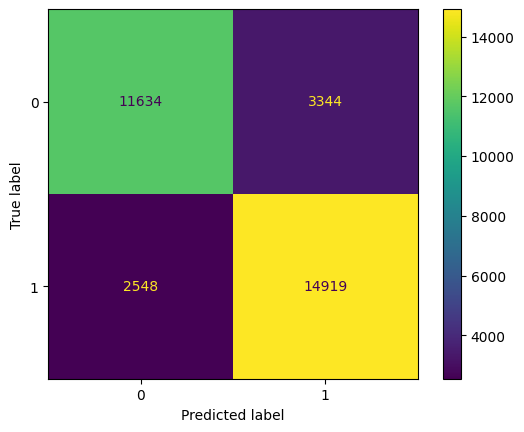

In [116]:
plot_confusion_matrix(model_CBC, X_test_tfidf_ft, y_test_tfidf_ft)  
plt.show()

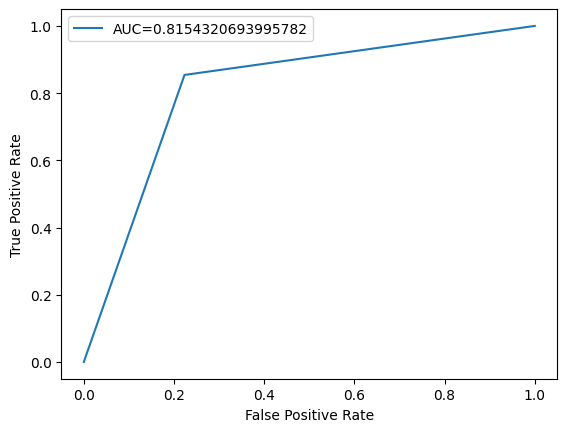

In [117]:
fpr, tpr, _ = metrics.roc_curve(y_test_tfidf_ft,  y_pred_cbc)
auc = metrics.roc_auc_score(y_test_tfidf_ft, y_pred_cbc)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

This is very good. As a note, this is also untuned. So, lets do some hypertuning.

## Catboost Classifer Hypertuning

In [9]:
from catboost import CatBoostClassifier
import xgboost
from xgboost import XGBClassifier

In [ ]:
model_CBC = CatBoostClassifier(learning_rate = 0.15, iterations = 225, min_data_in_leaf = 3, depth = 15, random_state =95, verbose =2)

In [12]:
model_xgb = XGBClassifier(verbosity = 2)

In [13]:
model_xgb.fit(X_train_tfidf_ft, y_train_tfidf_ft)

[18:59:31] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=6
[18:59:38] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[18:59:44] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[18:59:51] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=6
[18:59:57] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 86 extra 

[19:04:00] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[19:04:07] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[19:04:14] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[19:04:21] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[19:04:27] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 66 extra 

[19:08:34] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[19:08:41] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[19:08:48] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[19:08:55] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[19:09:02] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 76 extra 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [14]:
y_pred_xgb = model_xgb.predict(X_test_tfidf_ft)

In [15]:
print(classification_report(y_test_tfidf_ft, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75     14978
           1       0.78      0.84      0.81     17467

    accuracy                           0.78     32445
   macro avg       0.78      0.78      0.78     32445
weighted avg       0.78      0.78      0.78     32445



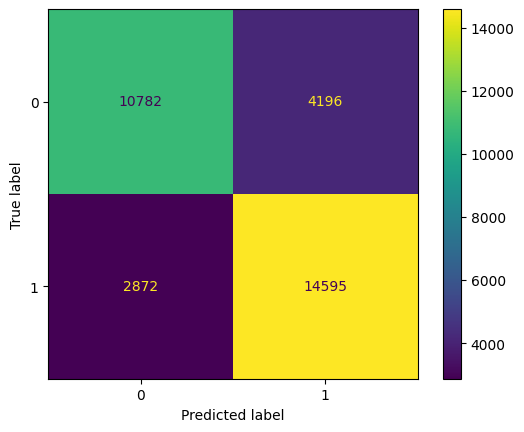

In [16]:
plot_confusion_matrix(model_xgb, X_test_tfidf_ft, y_test_tfidf_ft)  
plt.show()

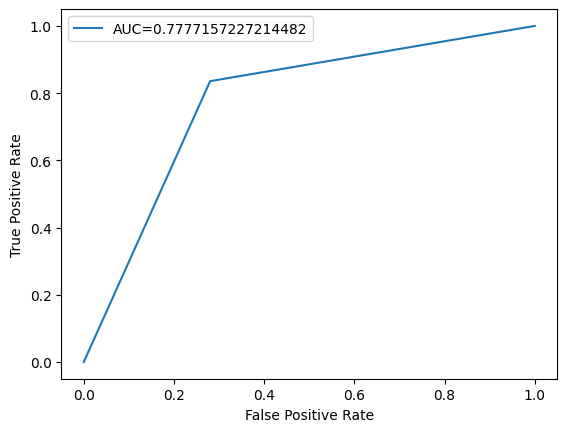

In [17]:
fpr, tpr, _ = metrics.roc_curve(y_test_tfidf_ft,  y_pred_xgb)
auc = metrics.roc_auc_score(y_test_tfidf_ft, y_pred_xgb)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

## GridSearchCV with XGBoost

(1) how many sub-trees to train; (2) the maximum tree depth (a regularization hyperparameter); (3) the learning rate; (4) the L1 (reg_alpha) and L2 (reg_ lambda) regularization rates that determine the extremity of weights on the leaves; (5) the complexity control (gamma=γ), a pseudo- regularization hyperparameter; and, (6) minimum child weight

In [101]:
xgb_grid = { 'model_xgb__n_estimators' : [300, 400, 500], 'model_xgb__eta' : [0.2], 'model_xgb__max_depth' : [5],
 'model_xgb__min_child_weight' : [1], 'model_xgb__gamma' : [1.5]}

In [102]:
xgb_pipe = Pipeline([('model_xgb', XGBClassifier())])

In [103]:
halving_cv_xgb = HalvingRandomSearchCV(estimator = xgb_pipe, param_distributions = xgb_grid, scoring="f1", n_jobs=-1, min_resources=2222, max_resources=60000, cv=5, factor=3, verbose=2, random_state=95)

In [104]:
halving_cv_xgb.fit(X_train_tfidf_ft, y_train_tfidf_ft)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 4
min_resources_: 2222
max_resources_: 60000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 3
n_resources: 2222
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 1
n_candidates: 1
n_resources: 6666
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END model_xgb__eta=0.2, model_xgb__gamma=1.5, model_xgb__max_depth=5, model_xgb__min_child_weight=1, model_xgb__n_estimators=300; total time=  49.4s
[CV] END model_xgb__eta=0.2, model_xgb__gamma=1.5, model_xgb__max_depth=5, model_xgb__min_child_weight=1, model_xgb__n_estimators=400; total time= 1.2min
[CV] END model_xgb__eta=0.2, model_xgb__gamma=1.5, model_xgb__max_depth=5, model_xgb__min_child_weight=1, model_xgb__n_estimators=500; total time= 3.7min
[CV] END model_xgb__eta=0.2, model_xgb__gamma=1.5, model_xgb__max_depth=5, model_xgb__min_child_weight=1, model_xgb__n_estimators=400; total time= 1.1min
[CV] END m

HalvingRandomSearchCV(estimator=Pipeline(steps=[('model_xgb',
                                                 XGBClassifier(base_score=None,
                                                               booster=None,
                                                               callbacks=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=None,
                                                               early_stopping_rounds=None,
                                                               enable_categorical=False,
                                                               eval_metric=None,
                                                               feature_types=None,
                                                               gamma=None,
                                                               gpu_id=None,
                                                               grow_policy=None,
                                                               importance_type=None,
                                                               interaction_con...
                                                               n_estimators=100,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               predictor=None,
                                                               random_state=None, ...))]),
                      max_resources=60000, min_resources=2222, n_jobs=-1,
                      param_distributions={'model_xgb__eta': [0.2],
                                           'model_xgb__gamma': [1.5],
                                           'model_xgb__max_depth': [5],
                                           'model_xgb__min_child_weight': [1],
                                           'model_xgb__n_estimators': [300, 400,
                                                                       500]},
                      random_state=95, scoring='f1', verbose=2)

In [105]:
halving_cv_xgb.best_score_

0.7603135852806456

In [106]:
halving_cv_xgb.best_params_

{'model_xgb__n_estimators': 500,
 'model_xgb__min_child_weight': 1,
 'model_xgb__max_depth': 5,
 'model_xgb__gamma': 1.5,
 'model_xgb__eta': 0.2}

In [107]:
optimal_model_xgb = halving_cv_xgb.best_estimator_
optimal_model_xgb

Pipeline(steps=[('model_xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eta=0.2,
                               eval_metric=None, feature_types=None, gamma=1.5,
                               gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.200000003, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=5, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=500,
                               n_jobs=0, num_parallel_tree=1, predictor='auto', ...))])

In [108]:
y_xbc_ft = optimal_model_xgb.predict(X_test_tfidf_ft)

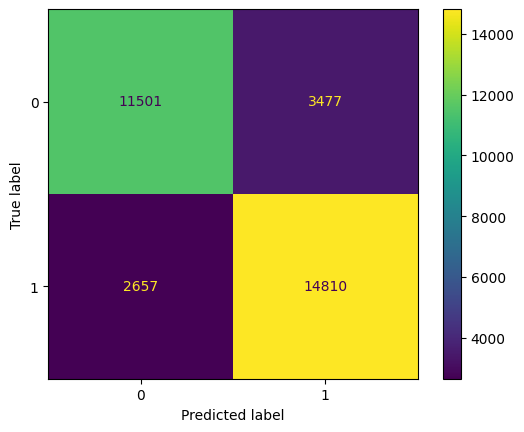

In [109]:
plot_confusion_matrix(halving_cv_xgb, X_test_tfidf_ft, y_test_tfidf_ft)  
plt.show()

In [110]:
print(classification_report(y_test_tfidf_ft, y_xbc_ft))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79     14978
           1       0.81      0.85      0.83     17467

    accuracy                           0.81     32445
   macro avg       0.81      0.81      0.81     32445
weighted avg       0.81      0.81      0.81     32445



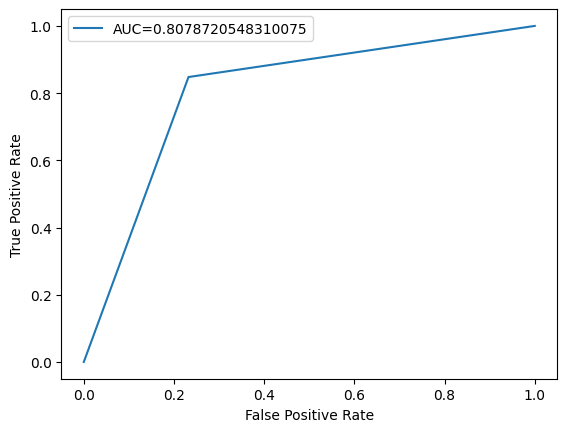

In [111]:
fpr, tpr, _ = metrics.roc_curve(y_test_tfidf_ft,  y_xbc_ft)
auc = metrics.roc_auc_score(y_test_tfidf_ft, y_xbc_ft)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()